In [212]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from transformers import pipeline

In [214]:
df_movies = pd.read_csv('/content/drive/My Drive/ColabNotebooks/rotten_tomatoes_movies.csv')
df_critic_review = pd.read_csv('/content/drive/My Drive/ColabNotebooks/rotten_tomatoes_critic_reviews.csv')
df_movies.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [215]:
df_movies.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


Content Rating Category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


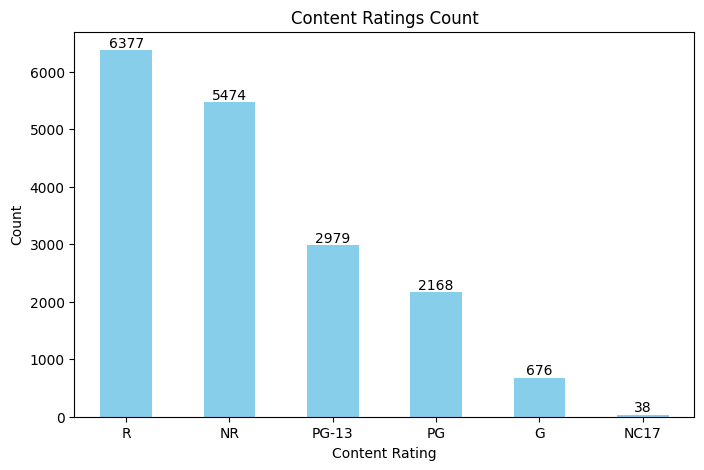

In [216]:
print(f"Content Rating Category: {df_movies['content_rating'].unique()}")

ax = df_movies['content_rating'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.title('Content Ratings Count')
plt.show()

In [217]:
content_rating = pd.get_dummies(df_movies['content_rating'])
content_rating.head()

,G,NC17,NR,PG,PG-13,R
0,False,False,False,True,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,True,False,False,False
4,True,False,False,False,False,False


Audience status category: ['Spilled' 'Upright' nan]


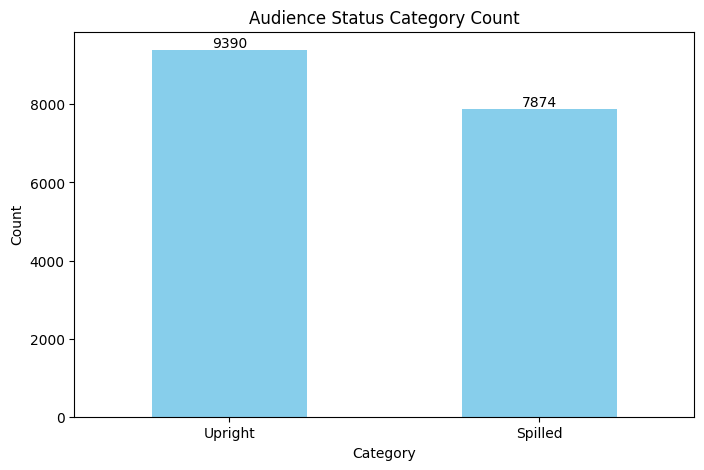

In [218]:
print(f"Audience status category: {df_movies['audience_status'].unique()}")

ax = df_movies['audience_status'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Audience Status Category Count')
plt.show()

In [219]:
audience_status = pd.DataFrame(df_movies['audience_status'].str.lower().replace(['spilled', 'upright'], [0, 1]))
df_movies['audience_status'] = audience_status
audience_status.head()

,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [220]:
tomatometer_status = pd.DataFrame(df_movies['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified-Fresh'], [0,1,2]))
tomatometer_status.head()

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0


In [221]:
df_feature = pd.concat([df_movies[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']], content_rating, audience_status, tomatometer_status], axis=1).dropna()
df_feature.head()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,False,False,False,True,False,False,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,False,False,False,False,False,True,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,False,False,False,False,False,True,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,False,False,True,False,False,False,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,True,False,False,False,False,False,1.0,1.0


In [222]:
df_feature.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,2.000000


In [223]:
len(df_feature)

17017

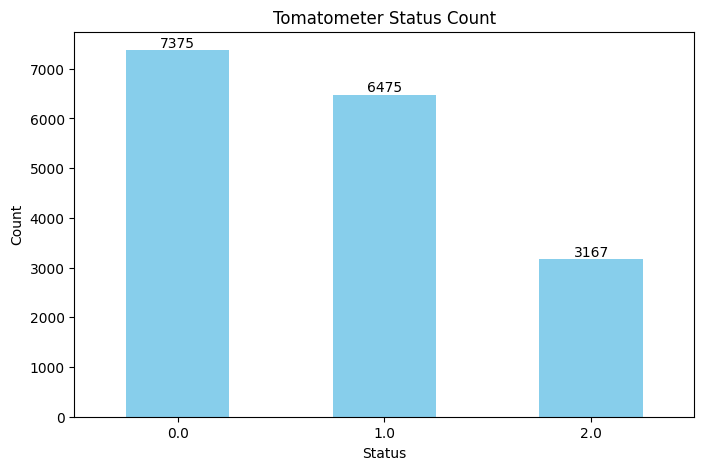

In [224]:
ax = df_feature['tomatometer_status'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Tomatometer Status Count')
plt.show()

In [225]:
x_train, x_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status'], axis=1), df_feature['tomatometer_status'], test_size=0.2, random_state=42)
print(f'Size of training data is {len(x_train)} and the size of test data is {len(x_test)}')

Size of training data is 13613 and the size of test data is 3404


In [226]:
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [227]:
tree_3_leaf.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [228]:
y_predict = tree_3_leaf.predict(x_test)

In [229]:
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9462397179788484
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.97      0.88      0.93      1286
         2.0       0.80      0.95      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.94      0.93      3404
weighted avg       0.95      0.95      0.95      3404



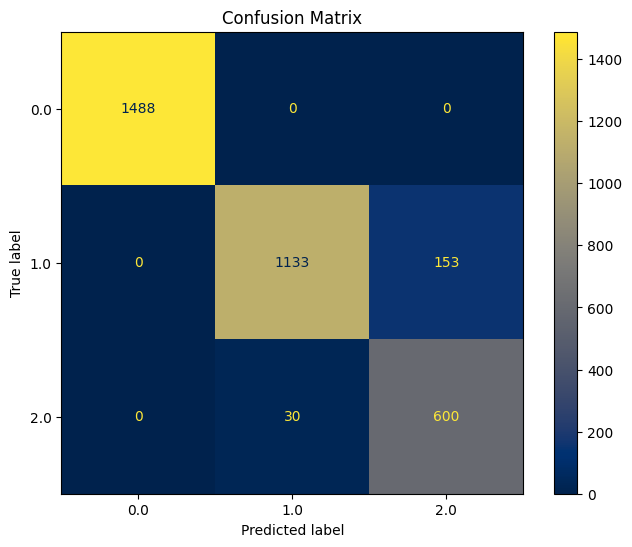

In [230]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(tree_3_leaf, x_test, y_test, cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

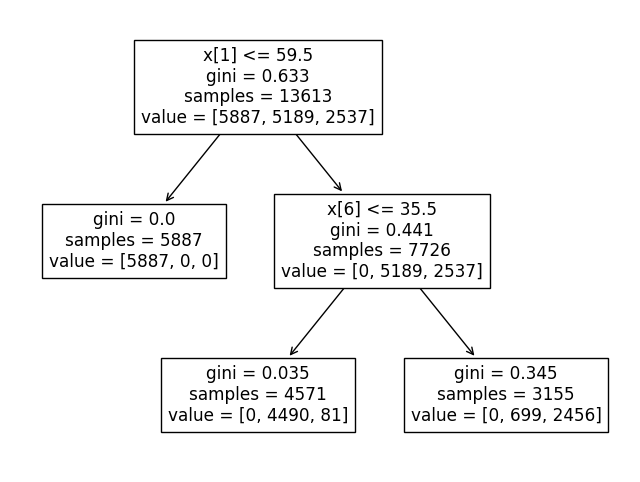

In [231]:
fig, ax = plt.subplots(figsize=(8, 6))
plot_tree(tree_3_leaf, ax=ax)
plt.show()

In [232]:
tree = DecisionTreeClassifier(random_state=2)
tree.fit(x_train, y_train)
y_predict = tree.predict(x_test)

print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

0.9900117508813161
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.97      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



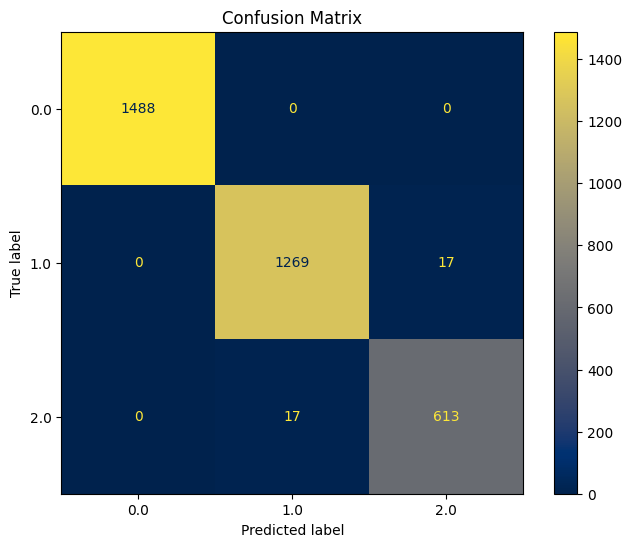

In [233]:
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(tree, x_test, y_test, cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

0.9908930669800236
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



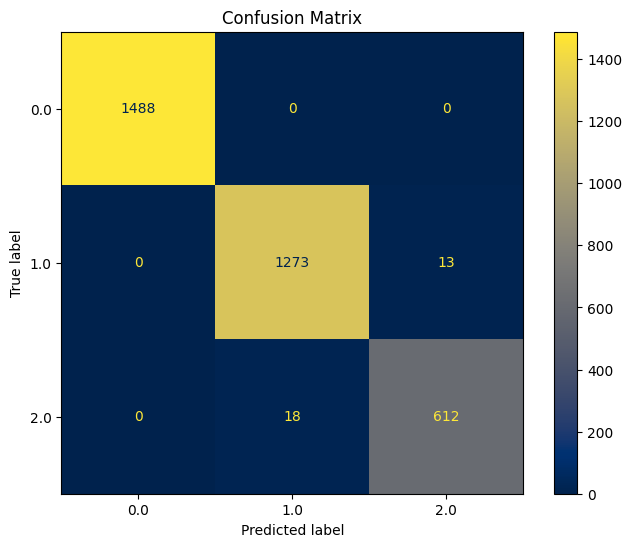

In [234]:
rf = RandomForestClassifier(random_state=2)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)

print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test, cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

runtime = 0.0061295693480302215
tomatometer_rating = 0.4751025864067028
tomatometer_count = 0.09895425717250429
audience_rating = 0.05389101976402856
audience_count = 0.016289896938110955
tomatometer_top_critics_count = 0.03605739578773787
tomatometer_fresh_critics_count = 0.14158242877024638
tomatometer_rotten_critics_count = 0.1314030539462201
G = 0.00029824734631526663
NC17 = 1.7090610669550172e-05
NR = 0.008710731204885382
PG = 0.0005762363713202383
PG-13 = 0.002531466583040527
R = 0.0022318936876928337
audience_status = 0.026224126062495294


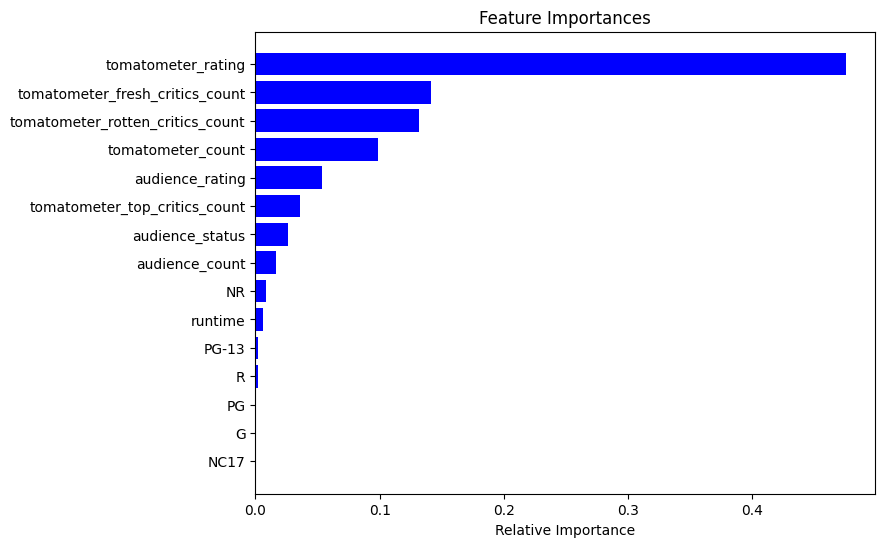

In [235]:
feature_importance = rf.feature_importances_

for i, feature in enumerate(x_train.columns):
  print(f'{feature} = {feature_importance[i]}')

indices = np.argsort(feature_importance)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [x_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [236]:
x_train, x_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status', 'NR', 'runtime', 'PG-13', 'R', 'PG', 'G', 'NC17'], axis=1), df_feature['tomatometer_status'], test_size=0.2, random_state=42)
print(f'Size of training data is {len(x_train)} and the size of test data is {len(x_test)}')

Size of training data is 13613 and the size of test data is 3404


0.9917743830787309
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



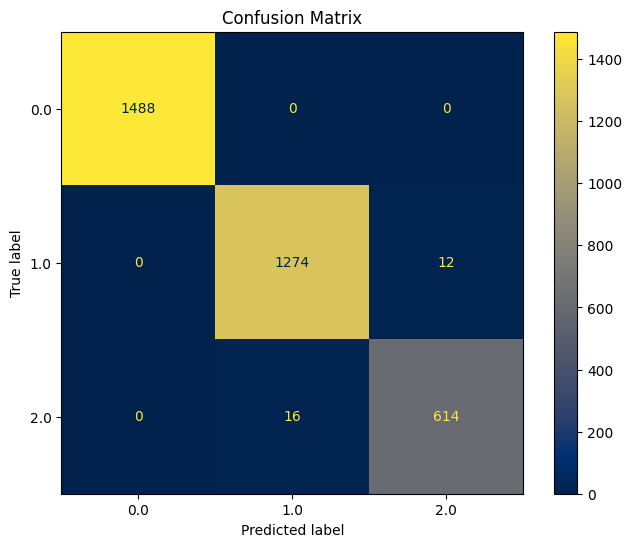

In [237]:
rf = RandomForestClassifier(random_state=2)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)

print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf, x_test, y_test, cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

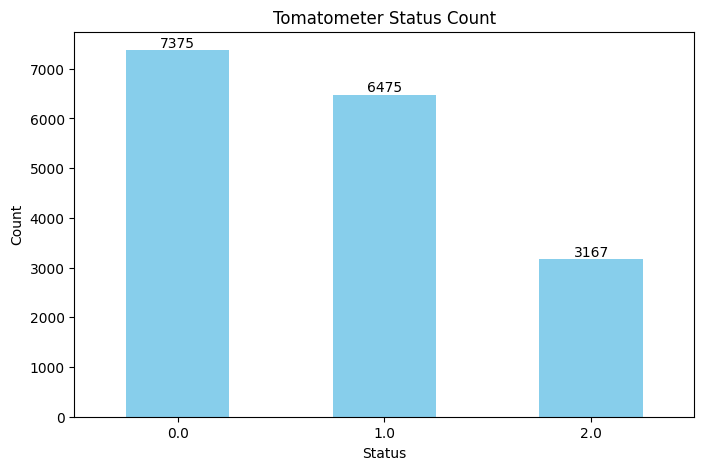

In [238]:
ax = df_feature['tomatometer_status'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Tomatometer Status Count')
plt.show()

In [239]:
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(df_feature['tomatometer_status']), y=df_feature['tomatometer_status'].values)
class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))
class_weight_dict

{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

0.9926556991774383
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.98      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



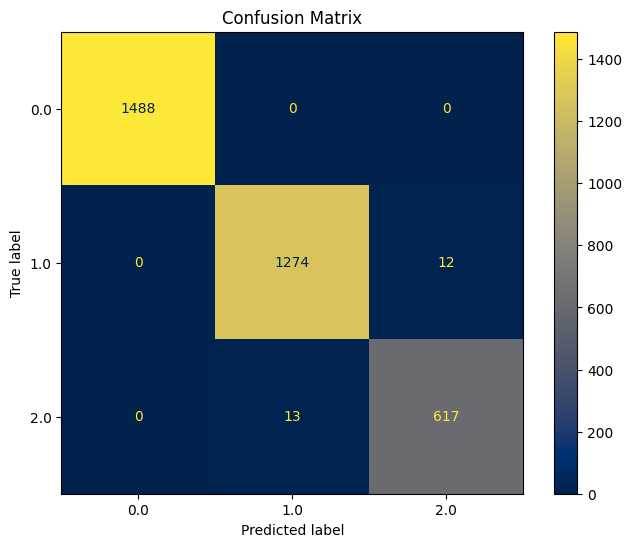

In [240]:
rf_weighted = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)
rf_weighted.fit(x_train, y_train)
y_predict = rf_weighted.predict(x_test)

print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(rf_weighted, x_test, y_test, cmap='cividis', ax=ax)
plt.title('Confusion Matrix')
plt.show()

In [241]:
training_feature_names = x_train.columns.tolist()
print(training_feature_names)

['tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'audience_status']


In [242]:
#getting features for movie "Body of Lies"
df_movies.loc[152]

rotten_tomatoes_link                                          m/10009225-body_of_lies
movie_title                                                              Body of Lies
movie_info                          CIA agent Roger Ferris (Leonardo DiCaprio) hat...
critics_consensus                   Body of Lies relies on the performances of Rus...
content_rating                                                                      R
genres                                                      Drama, Mystery & Suspense
directors                                                                Ridley Scott
authors                                                               William Monahan
actors                              Leonardo DiCaprio, Russell Crowe, Mark Strong ...
original_release_date                                                      2008-10-08
streaming_release_date                                                     2010-09-01
runtime                                               

In [244]:
#movie: "Body of Lies"
movie_features = pd.DataFrame({
    'tomatometer_rating': [55.0],
    'tomatometer_count': [213.0],
    'audience_rating': [62.0],
    'audience_count': [130010.0],
    'tomatometer_top_critics_count': [54],
    'tomatometer_fresh_critics_count': [117],
    'tomatometer_rotten_critics_count': [96],
    'audience_status': [1.0]
}, index=[0])

# Predict movie classification
classification_prediction = predict_movie_classification(rf_weighted, movie_features)
print(f"The movie is predicted to be {classification_prediction[0]}")

The movie is predicted to be Rotten
